In [1]:
## Colab specific
# import sys
# sys.path.append("/content/drive/MyDrive/colab_vir_env/lib/python3.10/site-packages")
# from google.colab import drive
# drive.mount("/content/drive")
# !source /content/drive/MyDrive/colab_vir_env/bin/activate
# (after installing the libraries to google drive you can just run the above code and use those libraries without installing them again.)

# !pip install undouble
# !pip install imagesc
# !pip install icecream
# !pip install easyocr
# !pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

## Colab specific imports
# from google.colab.patches import nbimshow

In [2]:
## Standard library imports
import logging
import ssl
import time
import urllib

## Related third-party imports
import cv2
import icecream as ic
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
# from scipy.spatial import distance
import skimage
# from skimage import color
# from skimage import io
import easyocr as eo

## Local application/library-specific imports
from ImageLib import *



In [3]:

logging.basicConfig(level=logging.DEBUG)
set_image_env('ipynb')

INFO:root:Set PYTHONENV to ipynb


# "Library" Methods

# Data Setup

In [116]:
img_folder = '/content/drive/MyDrive/Test Images'
img_1 = '/content/drive/MyDrive/Test Images/jesus1.jpg'
tempdir=r'/content/temp'

# Importing the files files from disk, cleaning and pre-processing
undouble_urls = ['https://erdogant.github.io/datasets/images/flower_images/flower_orange.png',
                                                                 'https://erdogant.github.io/datasets/images/flower_images/flower_white_1.png',
                                                                 'https://erdogant.github.io/datasets/images/flower_images/flower_white_2.png',
                                                                 'https://erdogant.github.io/datasets/images/flower_images/flower_yellow_1.png',
                                                                 'https://erdogant.github.io/datasets/images/flower_images/flower_yellow_2.png']

S3_ROOT = 'https://s3.amazonaws.com/hivemedia-images/creatives/'
img_names = [
        '2a293f7b3d88c205b239e6c880e448b3.jpg',
        '46ff5ae7be1759292d6a259da42ae3b6.jpg',
        '884cdda9ceb754dc905d5be768700463.jpg',
        'd98389b060ded14206c65abce3ca13d2.jpg',
        'e118b149d753a482221ac03bf8475ce7.jpg',
        'f02abc4967740835b4bf9a67ae019772.jpg',
        'd0ff493397a33fa6cc1c1d633cf064d2.jpg',
        '5d016b9867a35676d35c186f8716e6c0.jpg',
        '096691d558c6205f8edae90931294547.jpg',
        'c5e9c81fb81ff935d3a81a1f8782a845.jpg',
        'b51a7ddc20a5c5b683832474b56a0e0d.jpg',
        '24b2c40e6859bd9c1be75db5664686e9.jpg',
        '8d9c6e76c0376b07f76d350d02a50b10.jpg',
        'b84b33161c94965cf5d31227db9f77a1.jpg',
        '57d721c0bbf34f4fa092d0af67774295.jpg',
        'a7bb1c90ea65c2185b0cdbb7aec43059.jpg',
        '326032daacfa3a3f2e297dca21c48fd7.jpg',
        'acf2401b9ef648d5c1e6f154d40378d4.jpg',
        '45664f2a1c56ff91335b42f8a72cdb09.jpg',
        '9a90b39ed99dbee80213b84547f97daa.jpg',
        '80dc90e1562f27f38396f58fe6817081.jpg',
        'a661a7d08b4e5bda9c41a178be028804.jpg',
        'f123fb3758a4bd8287c2cab418cdae38.jpg',
        'a7259691cf0d2d9b3ff445b79637f787.jpg',
        'c3dd037a71d39af3a7301e49957c99ed.jpg',
        'd019947de69a65fd895f0beee649cafa.jpg',
        'ee45cdf05d90ffa4e784365cbfc56b43.jpg',
        '1c5a9f871550808fdccc8fc88d53f192.jpg',
        '753213c68372ae2006f7a83a9b662061.jpg',
]

## Prepend S3 URL to image names for full URL
img_urls = [f'{S3_ROOT}{i}' for i in img_names]
img_urls



['https://s3.amazonaws.com/hivemedia-images/creatives/2a293f7b3d88c205b239e6c880e448b3.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/46ff5ae7be1759292d6a259da42ae3b6.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/884cdda9ceb754dc905d5be768700463.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/d98389b060ded14206c65abce3ca13d2.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/e118b149d753a482221ac03bf8475ce7.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/f02abc4967740835b4bf9a67ae019772.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/d0ff493397a33fa6cc1c1d633cf064d2.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/5d016b9867a35676d35c186f8716e6c0.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/096691d558c6205f8edae90931294547.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/c5e9c81fb81ff935d3a81a1f8782a845.jpg',
 'https://s3.amazonaws.com/hivemedia-images/creatives/b51a7ddc20a5c5b6

# Prev Tests

## Detect SC gray

In [6]:
##-------------------------------------------------------------------------------- detect snap bar

snapbars, slices = characterize_bars(verti_clean, hori_clean, h, w)
ic.ic(snapbars, slices)


r1 = has_gray_overlay( image_cv[snapbars[0]+2][:], image_cv[snapbars[0]-3][:])
r2 = has_gray_overlay( image_cv[snapbars[1]-2][:], image_cv[snapbars[1]+3][:])
r3 = has_gray_overlay( image_cv[snapbars[1]+5][:], image_cv[snapbars[1]+3][:])
ic.ic(r1,r2,r3)


# nbimshow(image_cv[snapbars[0]-5:snapbars[1]+5][:])
# ## testing
# def stretchb(b):
#         r = np.array([b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b])
#         nbimshow(r)
# p1in = image_cv[snapbars[1]-2][:]
# p1out = image_cv[snapbars[1]+5][:]
# p1c = (p1out-p1in)
# ic.ic(np.average(p1in,axis=0))
# ic.ic(np.average(p1out,axis=0))
# ic.ic(np.average(p1c,axis=0))
# stretchb(p1in)
# stretchb(p1out)
# stretchb(p1c)


ic| hbars: [0, 406, 413, 600]
ic| hsegments: array([0, 2], dtype=int64)
ic| indices: array([406])
ic| horizontal: {342: [0, 599], 381: [0, 599], 406: [0, 599], 413: [0, 599]}
ic| snapbars: [342, 381], slices: 5
ic| r1: True, r2: True, r3: False


(True, True, False)

In [9]:
a = [413, 406, 381, 342]
b = a[3:9]
print(b)

[342]


## detect_bars

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\daniel.baker\\Desktop\\Python\\ImageHashing2024\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\daniel.baker\\Desktop\\Python\\ImageHashing2024\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal

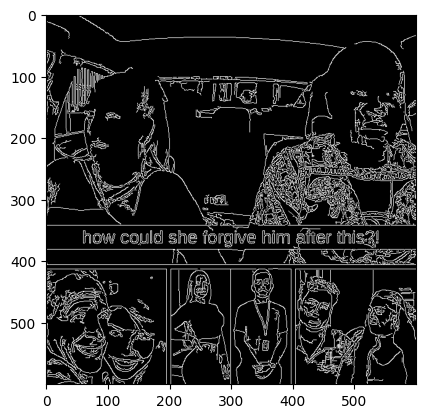

DEBUG:root:index_dim = 1 and span_dim = 0
DEBUG:root:index_dim = 0 and span_dim = 1
DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


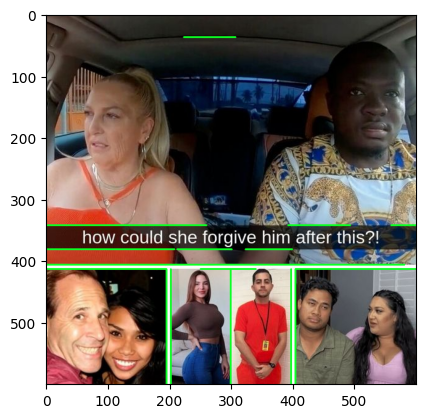

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


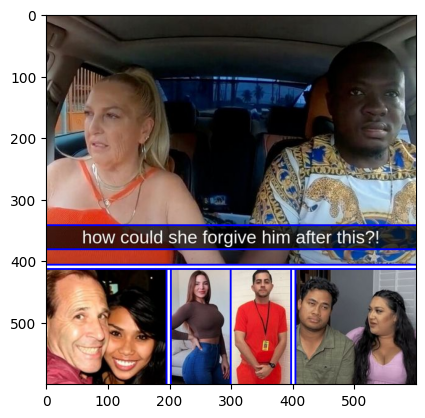

In [4]:
collage = 'https://scontent-sjc3-1.xx.fbcdn.net/v/t39.35426-6/434676141_1594946954586319_7322015044542239282_n.jpg?stp=dst-jpg_s600x600&_nc_cat=100&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=i7RJa6w96MEAX_vWKW2&_nc_ht=scontent-sjc3-1.xx&oh=00_AfDKgfghAGZDNgM4HGoGac0ezIVt54jGxGUERRh_j_k_Bw&oe=66114B24'
image_cv = url_to_image_cv2( collage )
img = image_cv

canny1 = cv2.Canny(image=image_cv, threshold1=0, threshold2=255)

h,w = canny1.shape
nbimshow(canny1)
result1 = image_cv.copy()
result2 = image_cv.copy()

contours_horizontal, contours_vertical = detect_bars(canny1)
hori_clean = clean_contours(contours_horizontal, 'horizontal', w*0.55, w-1, w/5)
verti_clean = clean_contours(contours_vertical, 'vertical', h*0.55, h-1, h/5)

## Display
draw_all_contours(result1, contours_horizontal)
draw_all_contours(result1, contours_vertical)
draw_dict_countours(result2, hori_clean, 'horizontal')
draw_dict_countours(result2, verti_clean, 'vertical')

# bar_qualities = characterize_bars(verti_clean, hori_clean, h, w)

# print(f'{bar_qualities = }')

nbimshow(result1)
nbimshow(result2)

# ## kinda easy bc its implemented by opencv, but worse results, hard to understand and
# ## overkill for this situation (all lines 90degress)
# result = image_cv.copy()
# lines = cv2.HoughLines(canny3,1,np.pi/4,200) # every pixel, 90 degree accuracy, 200 thresh
# for line in lines:
#         rho,theta = line[0]
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))

#         cv2.line(result,(x1,y1),(x2,y2),(0,0,255),2)
# nbimshow(result)

# ## sucks
# lines = cv2.HoughLinesP(canny3,1,np.pi/180,100,minLineLength=20,maxLineGap=20)
# for line in lines:
#        x1,y1,x2,y2 = line[0]
#        cv2.line(result,(x1,y1),(x2,y2),(0,255,0),2)
# nbimshow(result)

## Edge Detection

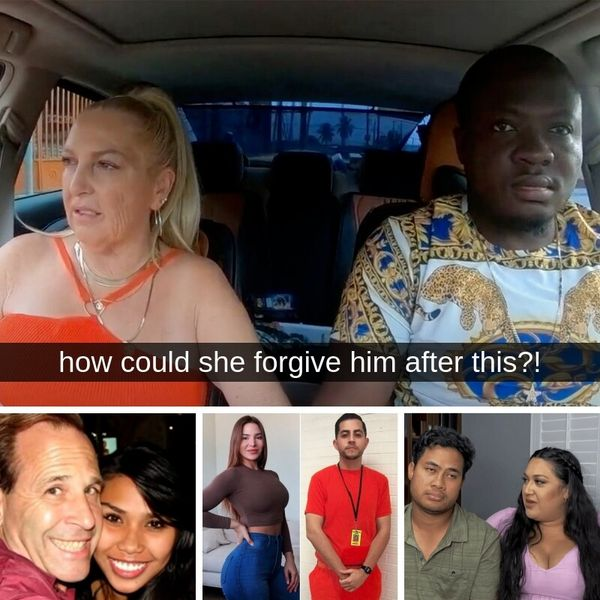

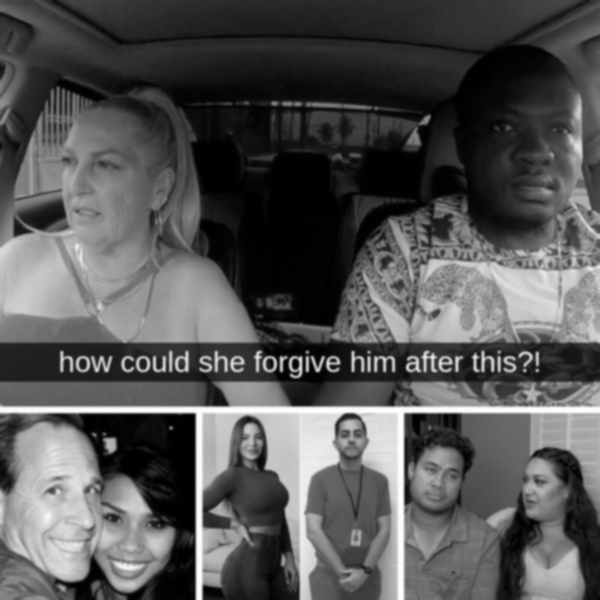

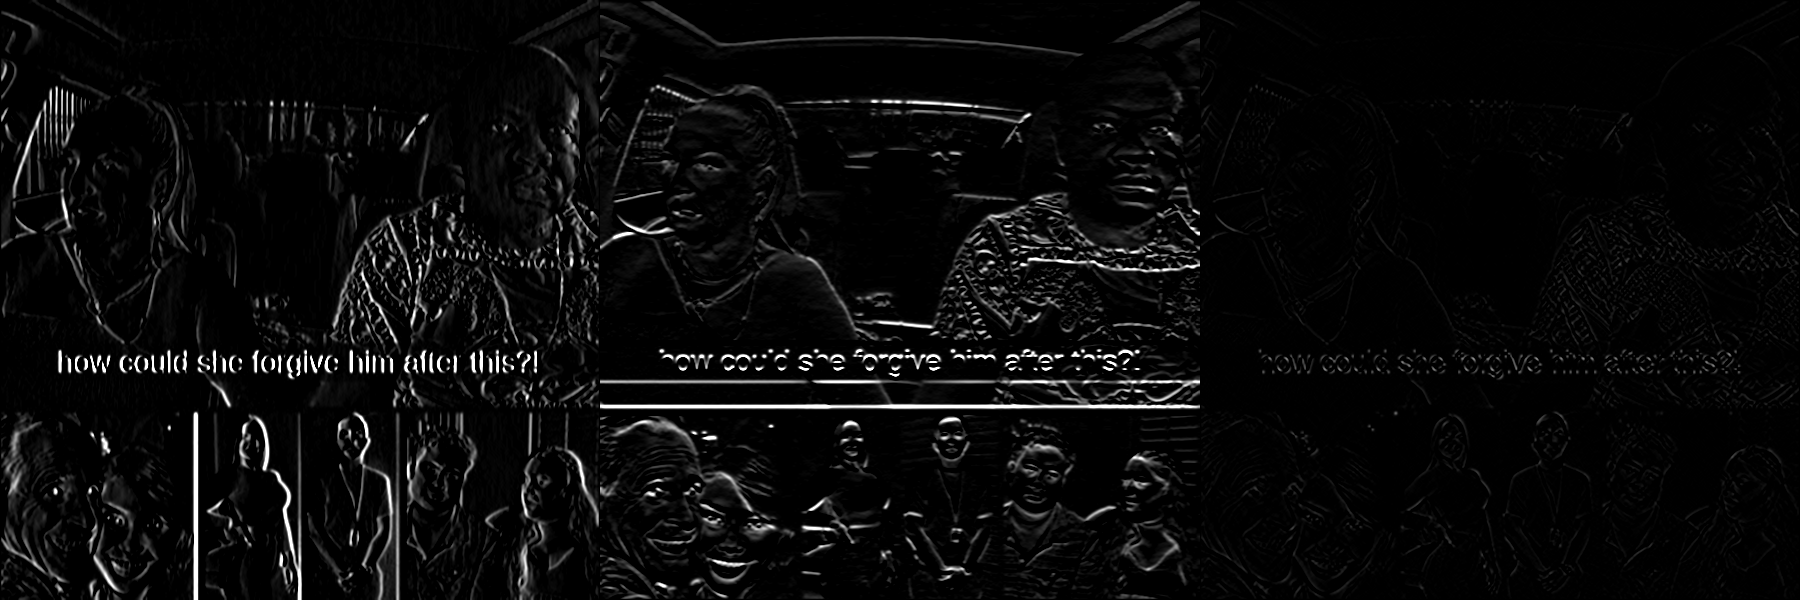

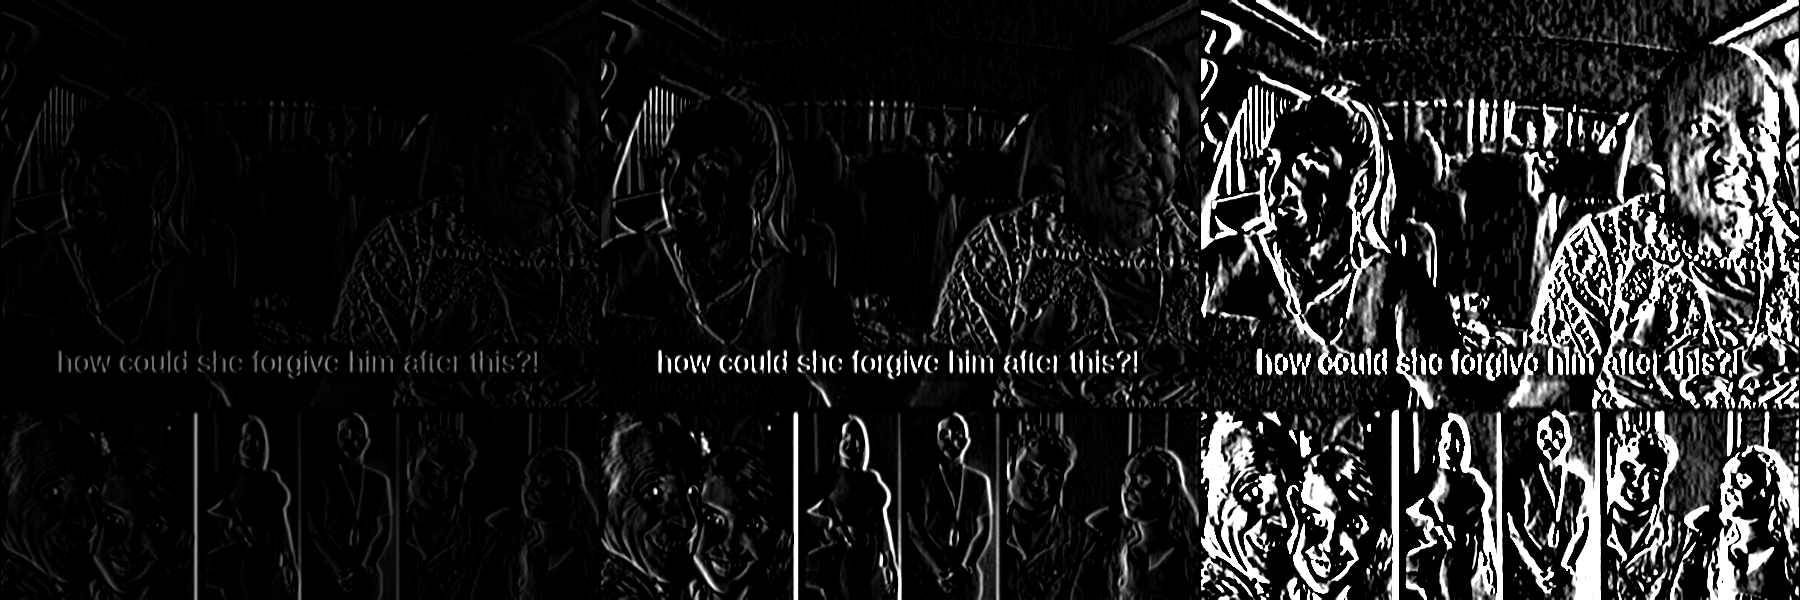

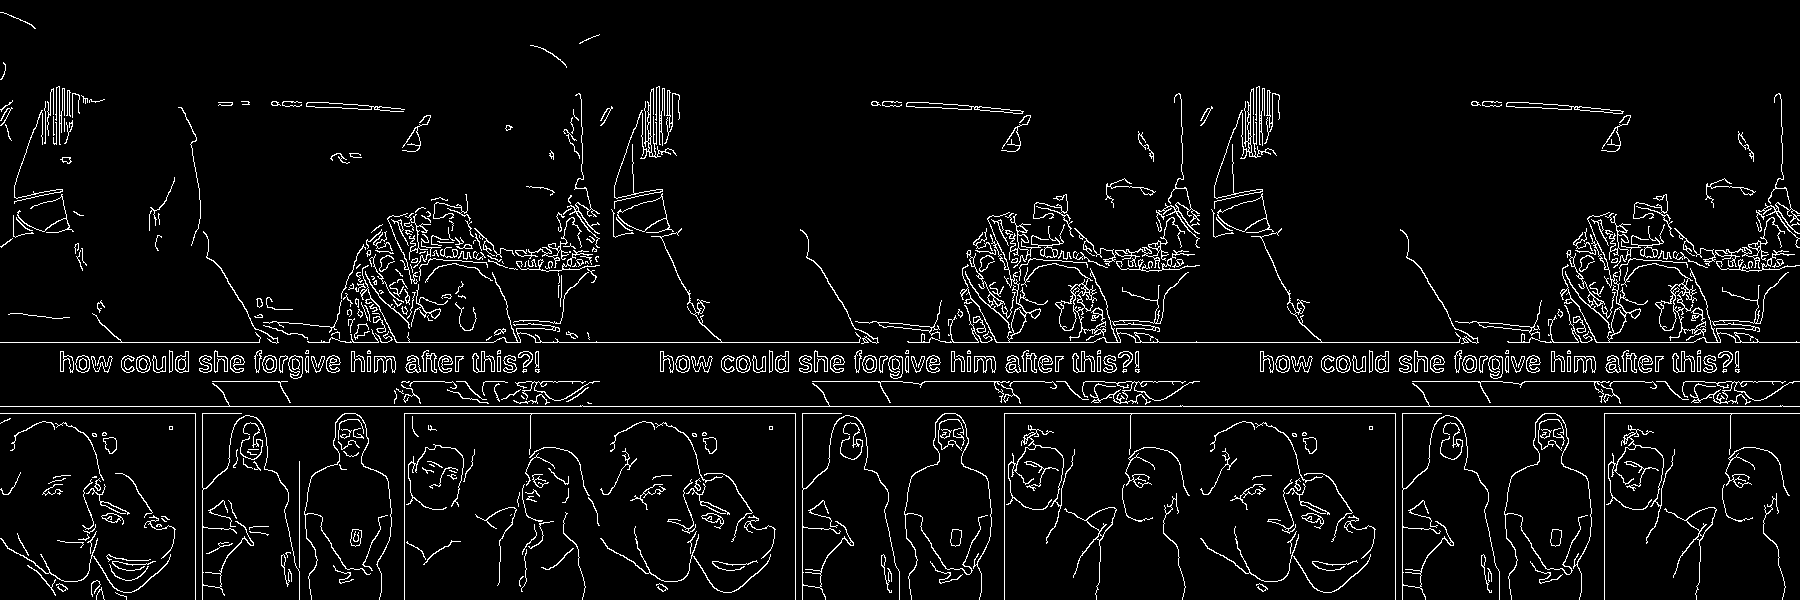

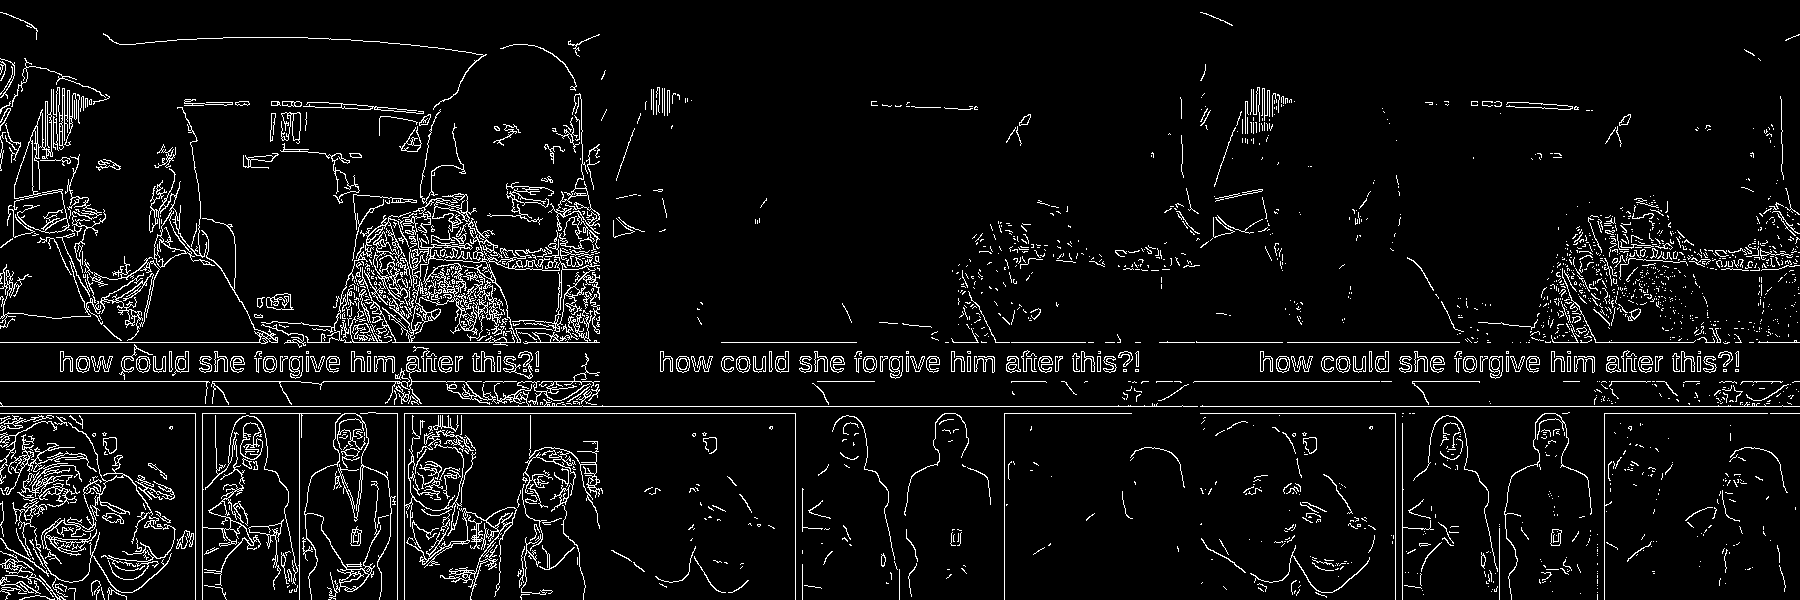

In [ ]:
collage = 'https://scontent-sjc3-1.xx.fbcdn.net/v/t39.35426-6/434676141_1594946954586319_7322015044542239282_n.jpg?stp=dst-jpg_s600x600&_nc_cat=100&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=i7RJa6w96MEAX_vWKW2&_nc_ht=scontent-sjc3-1.xx&oh=00_AfDKgfghAGZDNgM4HGoGac0ezIVt54jGxGUERRh_j_k_Bw&oe=66114B24'
image_cv = url_to_image_cv2( collage )
img = image_cv

## Determining best edge detection for reading collages
## Sobel catches a lot of noisy edges

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

nbimshow(image_cv)
nbimshow(img_blur)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

hori= np.concatenate((sobelx,sobely,sobelxy), axis = 1)
nbimshow(hori)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Combined X and Y Sobel Edge Detection

hori= np.concatenate((sobelx,sobely,sobelxy), axis = 1)
nbimshow(hori)

# --------------------------------------------------------------------------------
# Canny Edge Detection
canny1 = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
canny2 = cv2.Canny(image=img_blur, threshold1=300, threshold2=0) # Canny Edge Detection
canny3 = cv2.Canny(image=img_blur, threshold1=0, threshold2=300) # Canny Edge Detection
# Display Canny Edge Detection Image
hori= np.concatenate((canny1,canny2,canny3), axis = 1)
nbimshow(hori)


## blur really kills the snap lines
img_blur=img_gray ###################################### no blur
# Canny Edge Detection
canny1 = cv2.Canny(image=img_blur, threshold1=0, threshold2=255) # Canny Edge Detection
canny2 = cv2.Canny(image=img_blur, threshold1=400, threshold2=500) # Canny Edge Detection
canny3 = cv2.Canny(image=img_blur, threshold1=300, threshold2=300) # Canny Edge Detection
# Display Canny Edge Detection Image
hori= np.concatenate((canny1,canny2,canny3), axis = 1)
nbimshow(hori)


## OCR

DEBUG:root:OCRing image with shape: (816, 1560)
DEBUG:root:OCR complete.
DEBUG:root:[313, 230] - [880, 383]
DEBUG:root:[1513, 232] - [2080, 383]
DEBUG:root:[313, 860] - [880, 1010]
DEBUG:root:[1513, 861] - [2080, 1010]
DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\daniel.baker\\Desktop\\Python\\ImageHashing2024\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\d

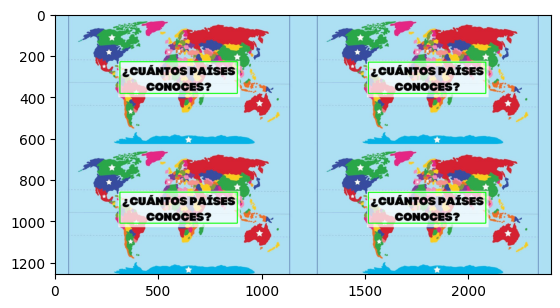

ic| combined_text: ('CUÁNTOS PAÍSES CONOCES CUANTOS PAÍSES CONOCES CUÁNTOS PAÍSES CONOCES CUANTOS '
                    'PAÍSES CONOCES')
ic| most_likely_language: 'PT'
    corrected: ('None PAÍSES conotes quantos PAÍSES conotes None PAÍSES conotes quantos '
                'PAÍSES conotes')
    accuracy: 1.1666666666666667
INFO:root:Poor accuracy (1.1666666666666667) with scale 0.65, retrying unscaled
DEBUG:root:OCRing image with shape: (1256, 2400)
DEBUG:root:OCR complete.
DEBUG:root:[318, 235] - [880, 383]
DEBUG:root:[1518, 236] - [2080, 383]
DEBUG:root:[318, 864] - [880, 1012]
DEBUG:root:[1518, 864] - [2080, 1012]
DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


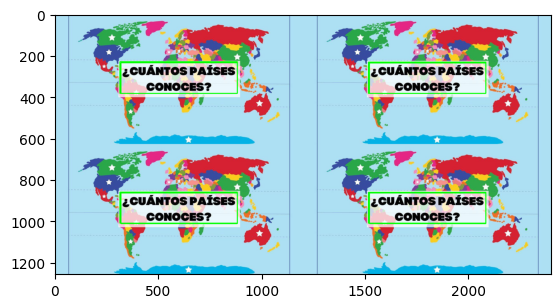

ic| combined_text: ('CUÁNTOS PAÍSES CONOCES CUÁNTOS PAÍSES CONOCES CUÁNTOS PAÍSES CONOCESP '
                    'CUÁNTOS PAÍSES CONOCESP')
ic| most_likely_language: 'PT'
    corrected: 'None PAÍSES conotes None PAÍSES conotes None PAÍSES None None PAÍSES None'
    accuracy: 0.8333333333333334
DEBUG:root:OCRing image with shape: (780, 780)
DEBUG:root:OCR complete.
DEBUG:root:[46, 344] - [547, 393]
DEBUG:root:[652, 344] - [1147, 384]
DEBUG:root:[46, 944] - [547, 993]
DEBUG:root:[652, 944] - [1147, 984]
DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


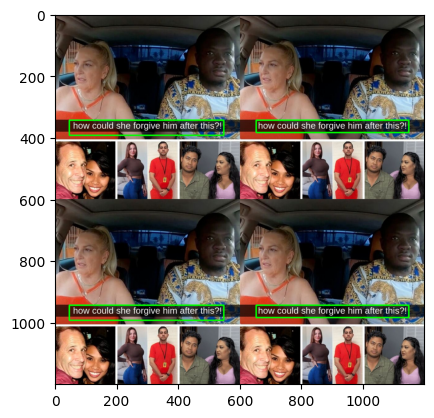

ic| combined_text: ('how could she forgive him after this?! Ti how could she forgive him after '
                    'this how could she forgive him after this?! Ti how could she forgive him '
                    'after this')
ic| most_likely_language: 'EN'
    corrected: ('how could she forgive him after None Ti how could she forgive him after this '
                'how could she forgive him after None Ti how could she forgive him after this')
    accuracy: 1.8666666666666667


In [5]:
logging.basicConfig(level=logging.INFO)

image_cv = url_to_image_cv2( 'https://s3.amazonaws.com/hivemedia-images/creatives/1cadcd9e23ebb4d973ab06b0a5f99bf7.jpg' )
collage = 'https://scontent-sjc3-1.xx.fbcdn.net/v/t39.35426-6/434676141_1594946954586319_7322015044542239282_n.jpg?stp=dst-jpg_s600x600&_nc_cat=100&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=i7RJa6w96MEAX_vWKW2&_nc_ht=scontent-sjc3-1.xx&oh=00_AfDKgfghAGZDNgM4HGoGac0ezIVt54jGxGUERRh_j_k_Bw&oe=66114B24'
image_cv2 = url_to_image_cv2( collage )
## Combine images to test paragraphing
hori= np.concatenate((image_cv,image_cv), axis = 1)
mash= np.concatenate((hori,hori), axis = 0)
hori2= np.concatenate((image_cv2,image_cv2), axis = 1)
mash2= np.concatenate((hori2,hori2), axis = 0)

## Setup
## AttributeError: module 'easyocr' has no attribute 'Reader'
## occurs when using GPU package without GPU
reader = eo.Reader(['es', 'en', 'pt'])
spell_checker_en = SpellChecker(language='en',distance=1)
spell_checker_es = SpellChecker(language='es',distance=1)
spell_checker_pt = SpellChecker(language='pt',distance=1)
language_dicts = {"EN": spell_checker_en, "ES": spell_checker_es, "PT": spell_checker_pt}


def ocr_retry(img, scale):
        ocr = eOCR(img, reader, shrinkfactor=scale)

        ## DEBUG Drawings
        texts = []
        for paragraph in ocr:
                bounds, text = paragraph
                img = draw_boxes(img, bounds)
                texts.append(text)
        nbimshow(img)

        combined_text = ' '.join([remove_punctuation(text) for text in texts])
        ic.ic(combined_text)
        most_likely_language, corrected, accuracy = detect_language(remove_punctuation(combined_text), language_dicts)
        return most_likely_language, corrected, accuracy


SCALE = 0.65

## Image 1
most_likely_language, corrected, accuracy = ocr_retry(mash, SCALE)
ic.ic(most_likely_language, corrected, accuracy)
if accuracy<1.3:
        logging.info(f'Poor accuracy ({accuracy}) with scale {SCALE}, retrying unscaled')
        most_likely_language, corrected, accuracy = ocr_retry(mash, 1)
        ic.ic(most_likely_language, corrected, accuracy)
if accuracy<0.8:
        logging.info(f'Poor accuracy with full scale')

## Image 2
most_likely_language, corrected, accuracy = ocr_retry(mash2, SCALE)
ic.ic(most_likely_language, corrected, accuracy)
if accuracy<1.3:
        logging.info(f'Poor accuracy ({accuracy}) with scale {SCALE}, retrying unscaled')
        most_likely_language, corrected, accuracy = ocr_retry(mash2, 1)
        ic.ic(most_likely_language, corrected, accuracy)
if accuracy<0.8:
        logging.info(f'Poor accuracy with full scale')

DEBUG:root:OCRing image with shape: (377, 720)
DEBUG:root:OCR complete.
DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


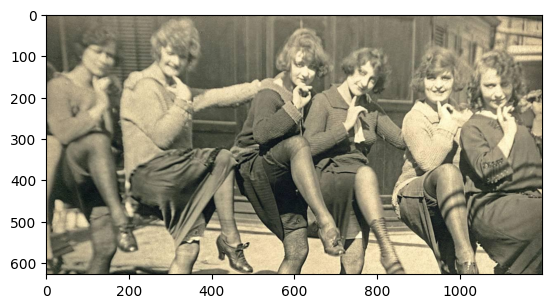

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


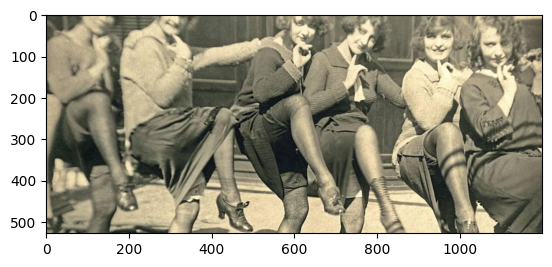

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


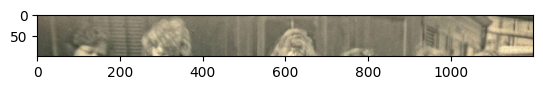

ic| texts: []
ic| bounds_height: []
ic| has_sc_height: False


False

In [39]:
no_text_url = 'https://s3.amazonaws.com/hivemedia-images/creatives/2a293f7b3d88c205b239e6c880e448b3.jpg'
mash2 = url_to_image_cv2( no_text_url )
ocr = eOCR(mash2, reader, shrinkfactor=.6)
img = mash2.copy()
# img = cv2.resize( img, (0,0), fx = .3, fy = .3)
ocr = reader.readtext(img, paragraph=True
                    # , low_text=0.6
                    # , text_threshold=0.8
                    )
for paragraph in ocr:
    bounds, text = paragraph
    img = draw_boxes(img, bounds)
    # ic.ic(prob)
    ic.ic(text)
nbimshow(img)
nbimshow(img[:][100:])
nbimshow(img[:][0:100])


texts = [text for _,text in ocr]
bounds = [bounds for bounds,_ in ocr]
# bounds, text = ocr[0]
bounds_height = [abs(bound[0][1]-bound[2][1]) for bound in bounds]
has_sc_height = False
for h in bounds_height:
    if abs(h-40)<8: 
        has_sc_height = True
        break
ic.ic(texts)
ic.ic(bounds_height)
ic.ic(has_sc_height)
# ic.ic(ocr)

## Mode Colors

         hex  counts       pct
138  #f0f0d2   12517  0.139078
137  #f0f0b4    4899  0.054433
132  #f0d296    4787  0.053189
128  #f0b478    4448  0.049422
43   #783c3c    4070  0.045222
..       ...     ...       ...
113  #d2d278       1  0.000011
34   #5a5a1e       1  0.000011
95   #d25a1e       1  0.000011
29   #5a3c00       1  0.000011
54   #789678       1  0.000011

[140 rows x 3 columns]


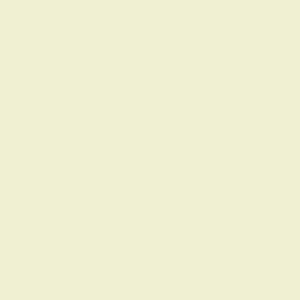

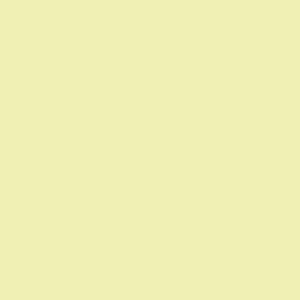

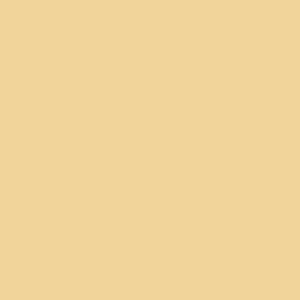

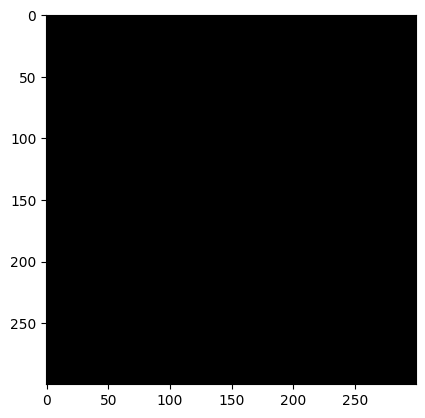

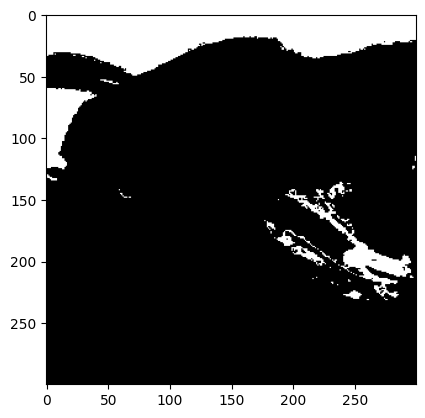

In [ ]:
### Testing mode colors
MICRO = (10,10)
TINY = (100,100)
SMALL = (300,300)
BIG = (600,600)
current_size = SMALL

image_cv = url_to_image_cv2( img_urls[0] )
img_cv2 = cv2.resize(image_cv, current_size, interpolation= cv2.INTER_LINEAR)
# img_cv2
# print(f'{img_cv2 = }')

# print(img_cv2)
# for row in roundedcolors:
#         for color in row:
#                 print(color)


COLOR_RADIUS = 30
img_rounded = compress_colors(img_cv2, COLOR_RADIUS)
modes = mode_colors(img_rounded)



# mode_colors = stats.mode(roundedcolors)
from PIL import Image
img = Image.new('RGB', (300,300), color = modes[0] )
display(img)
img = Image.new('RGB', (300,300), color = modes[1] )
display(img)
img = Image.new('RGB', (300,300), color = modes[2] )
# print(mode_colors[0])
display(img)


## Use mask to see if mode is common in unrounded img
c1 = modes[0]
c1 = hex_to_bgr(c1)
mask = c1
# print(mask)
plot_mask(img_cv2, mask)
plot_mask(img_rounded, mask)


In [ ]:
### Old bad mode code

# import scipy.stats as stats
# mode_colors = stats.mode(roundedcolors.reshape(current_size[0]*current_size[1],3), axis=0)
# mode_hex = stats.mode(arr)
# print(mode_hex)


# print(roundedcolors.reshape(current_size[0]*current_size[1],3))
# print(f'{mode_colors = }')

# mode_color_rgb = mode_colors[0][::-1]
# img = Image.new('', (300,300), color = tuple(mode_color_rgb)


## DHash PHash

In [10]:
## hashing
## https://pyimagesearch.com/2017/11/27/image-hashing-opencv-python/

url =img_urls[1]
img = url_to_image_cv2( url )

dhash = diff_hash(img, 8)
dhash = bin_to_hex(dhash, leading_zero_width=4)
print(f'{dhash = }')

phash = perceptual_hash(img)
print(f'{phash = }')

NameError: name 'img_urls' is not defined

In [ ]:
######### testing
url =img_urls[0]+"1sdf"
# image = skimage.io.imread( url )
# print(image)

# img = retry(url_to_image, kwargs={'url':url})
url =img_urls[0]
image_cv = url_to_image_cv2( url )
image_sk = url_to_image_ski( url )

## both are nice
# nbimshow(image_cv)
# image_sk

print(f'{image_cv.shape = }')
print(f'{image_sk.shape = }')

# print(f'{image_cv = }')
# print(f'{image_sk = }')

# image_cv[:, :, ::-1] ## convert RGB BGR
# img_gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

## Get image info
hist,h,w,c = image_info(image_cv)
print(f'{h,w,c = }')
print(f'{nearest_normal_aspect_ratio(h,w) = }')




# image_cv = img_scaled
# import scipy.stats as stats
# m = stats.mode(image_cv)
## this is slow? and gives weird results. mode for every col

# blur = cv2.blur(image_cv,(10,10))

# plt.subplot(121),plt.imshow(image_cv),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
# plt.xticks([]), plt.yticks([])
# plt.show()


# from PIL import Image
# img = Image.new('RGB', (300,300), color = (254, 254, 216))
# display(img)

image_cv.shape = (627, 627, 3)
image_sk.shape = (627, 627, 3)
h,w,c = (627, 627, 3)
nearest_normal_aspect_ratio(h,w) = ('1:1', {'w': '1', 'h': '1'})


## "AVG" Color (shrink 1,1)

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


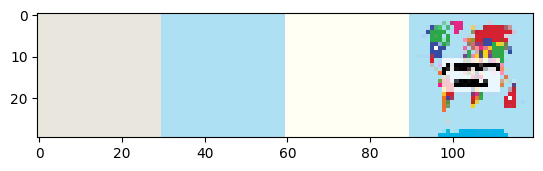

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


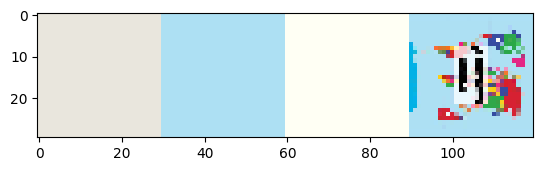

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


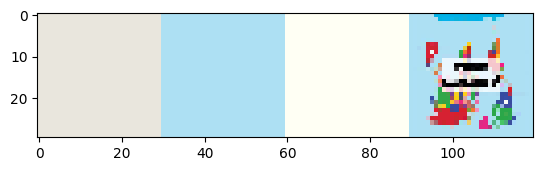

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


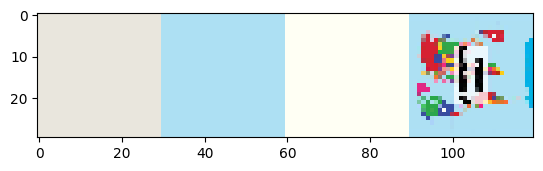

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


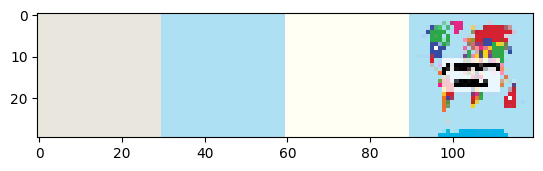

In [ ]:
#### Testing shrink algos
# All rotation agnostic EXCEPT for nearest (uses top left)

SIZE = (30,30)

img_cv2 = cv2.resize(image_cv, SIZE, interpolation= cv2.INTER_LINEAR)

## Shrink algos, then expand
s1 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_LINEAR)
s2 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_NEAREST)
s3 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_CUBIC)
s1 = cv2.resize(s1, SIZE, interpolation= cv2.INTER_AREA)
s2 = cv2.resize(s2, SIZE, interpolation= cv2.INTER_AREA)
s3 = cv2.resize(s3, SIZE, interpolation= cv2.INTER_AREA)

## Concatenate images in horizontal axis for comparison
hori= np.concatenate((s1,s2,s3,img_cv2), axis = 1)
nbimshow(hori)

img_cv2 = cv2.rotate(img_cv2, cv2.ROTATE_90_CLOCKWISE)
## Shrink algos, then expand
s1 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_LINEAR)
s2 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_NEAREST)
s3 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_CUBIC)
s1 = cv2.resize(s1, SIZE, interpolation= cv2.INTER_AREA)
s2 = cv2.resize(s2, SIZE, interpolation= cv2.INTER_AREA)
s3 = cv2.resize(s3, SIZE, interpolation= cv2.INTER_AREA)

## Concatenate images in horizontal axis for comparison
hori= np.concatenate((s1,s2,s3,img_cv2), axis = 1)
nbimshow(hori)

img_cv2 = cv2.rotate(img_cv2, cv2.ROTATE_90_CLOCKWISE)
## Shrink algos, then expand
s1 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_LINEAR)
s2 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_NEAREST)
s3 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_CUBIC)
s1 = cv2.resize(s1, SIZE, interpolation= cv2.INTER_AREA)
s2 = cv2.resize(s2, SIZE, interpolation= cv2.INTER_AREA)
s3 = cv2.resize(s3, SIZE, interpolation= cv2.INTER_AREA)

## Concatenate images in horizontal axis for comparison
hori= np.concatenate((s1,s2,s3,img_cv2), axis = 1)
nbimshow(hori)

img_cv2 = cv2.rotate(img_cv2, cv2.ROTATE_90_CLOCKWISE)
## Shrink algos, then expand
s1 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_LINEAR)
s2 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_NEAREST)
s3 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_CUBIC)
s1 = cv2.resize(s1, SIZE, interpolation= cv2.INTER_AREA)
s2 = cv2.resize(s2, SIZE, interpolation= cv2.INTER_AREA)
s3 = cv2.resize(s3, SIZE, interpolation= cv2.INTER_AREA)

## Concatenate images in horizontal axis for comparison
hori= np.concatenate((s1,s2,s3,img_cv2), axis = 1)
nbimshow(hori)

img_cv2 = cv2.rotate(img_cv2, cv2.ROTATE_90_CLOCKWISE)
## Shrink algos, then expand
s1 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_LINEAR)
s2 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_NEAREST)
s3 = cv2.resize(img_cv2, (1,1), interpolation= cv2.INTER_CUBIC)
s1 = cv2.resize(s1, SIZE, interpolation= cv2.INTER_AREA)
s2 = cv2.resize(s2, SIZE, interpolation= cv2.INTER_AREA)
s3 = cv2.resize(s3, SIZE, interpolation= cv2.INTER_AREA)

## Concatenate images in horizontal axis for comparison
hori= np.concatenate((s1,s2,s3,img_cv2), axis = 1)
nbimshow(hori)

# `__MAIN__`

DEBUG:root:Running nbimshow
DEBUG:root:Showing with matplotlib


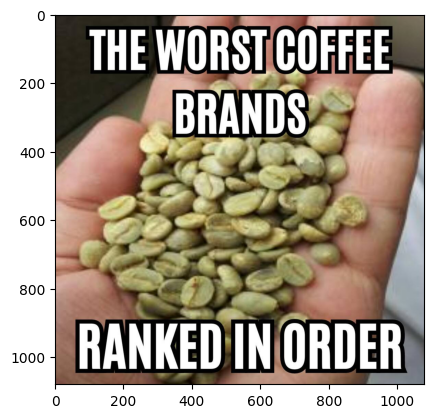

'0x79f1687a3f3e070e'

In [6]:
# images = []
# for url in img_urls:
#         images.append(url_to_image(url))
# images = np.array(images)

# print(len(images))
# images[0]

url = 'https://www.hareal.com/wp-content/uploads/2024/03/11-72156.jpg'
img = url_to_image_cv2( url )
nbimshow(img)
phash = perceptual_hash(img)
phash